In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [3]:
#load the dataset
X_train=np.loadtxt('dataset/CNN_data/input.csv', delimiter=',')
Y_train=np.loadtxt('dataset/CNN_data/labels.csv', delimiter=',')

X_test=np.loadtxt('dataset/CNN_data/input_test.csv', delimiter=',')
Y_test=np.loadtxt('dataset/CNN_data/labels_test.csv', delimiter=',')

In [4]:
#reshape the file


In [5]:
X_train=X_train.reshape(len(X_train), 100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)

X_test=X_test.reshape(len(X_test), 100,100,3)
Y_test=Y_test.reshape(len(Y_test), 1)

X_train= X_train/255.0
X_test=X_test/255.0

In [7]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


In [8]:
#generating the ranndom image


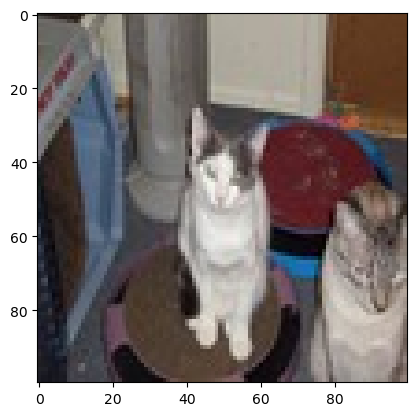

In [17]:
idx=random.randint(0, len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

In [15]:
 a.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [10]:
#model

In [20]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu',))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
#training

In [23]:
model.fit(X_train, Y_train, epochs=5, batch_size=64)

Epoch 1/5


32/32 [==============================] - 7s 116ms/step - loss: 0.6996 - accuracy: 0.5155
Epoch 2/5
32/32 [==============================] - 4s 114ms/step - loss: 0.6502 - accuracy: 0.6325
Epoch 3/5
32/32 [==============================] - 4s 115ms/step - loss: 0.5828 - accuracy: 0.6970
Epoch 4/5
32/32 [==============================] - 4s 119ms/step - loss: 0.4983 - accuracy: 0.7690
Epoch 5/5
32/32 [==============================] - 4s 118ms/step - loss: 0.4348 - accuracy: 0.7985


In [29]:
# evaluate the accuarcy
model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 22ms/step - loss: 0.6017 - accuracy: 0.6900


[0.6016530990600586, 0.6899999976158142]

In [30]:
#making prediction

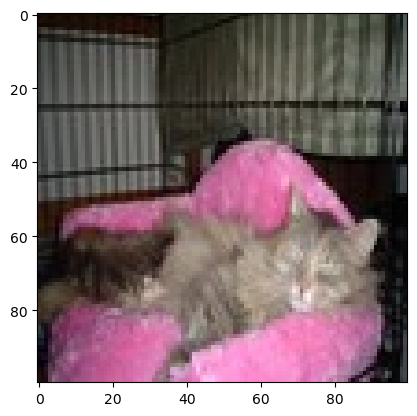

1/1 [==============================] - 0s 56ms/step
our model say it as the: cat


In [33]:
#let us select random test image randomly
idx2=random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()


y_pred=model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred=y_pred>0.5

if(y_pred==0):
    pred='dog'
else:
    pred='cat'
    
    
print("our model say it as the:", pred)
